# **Trabajo 3 Ténicas en Aprendizaje Estadístico: Clasificación de personas usando gafas de sol**

## **Integrantes**

- Alejandro Ortiz Mejía

1. Se importan las librerías necesarias para ejecutar el código.

In [ ]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

import os

2. Se define la función encargada de cargar y preprocesar las imágenes.

In [ ]:
def load_data_set_from_folder(folder_path):
    X = []  # Images in 1D shape.
    y = []  # Labels (1: the person is wearing sunglasses, 0: the person is not wearing sunglasses).
    
    for filename in os.listdir(folder_path):
        image = cv2.imread(os.path.join(folder_path, filename))
        
        if image is not None:
            X.append(cv2.split(image)[0].flatten())
            y.append(1 if "sunglasses" in filename else 0)
        
    X = preprocessing.normalize(np.asarray(X))
    
    return X, np.asarray(y)

3. Se accede a Google Drive, donde están cargadas las imágenes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


4. Se cargan las imágenes y sus respectivas etiquetas.

In [ ]:
folder_images_path = "/content/gdrive/MyDrive/Universidad/Técnicas en aprendizaje estadístico/Trabajos/Trabajo 3/Definitivo/faces_png"
X, y = load_data_set_from_folder(folder_images_path)

5. Se divide el conjunto de imágenes entre entrenamiento y testeo de manera aleatoria.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## **Modelo 1: Regresión Logística**

1. Se define el modelo y se ajusta (entrena) con el conjunto de entrenamiento.

In [ ]:
logistic_regression = LogisticRegression().fit(X_train, y_train)

2. Se hace las predicciones con el conjunto de testeo.

In [ ]:
predictions = logistic_regression.predict(X_test)

3. Se extraen los coeficientes ajustados de la regresión logística.

In [ ]:
coeficients = logistic_regression.coef_.reshape(120, 128)

4. Se grafican los coeficientes aprendidos por la regresión logística, en donde los colores más intensos representan coeficientes de mayor magnitud, es decir, más importantes.

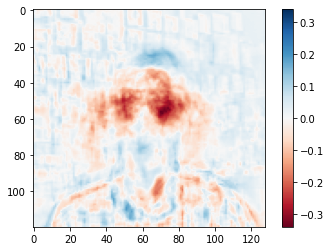

In [ ]:
scale = np.max(np.abs(logistic_regression.coef_))
plt.imshow(coeficients, cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
plt.colorbar()

5. Se predicen imágenes para demostrar el funcionamiento.

No está usando gafas de sol


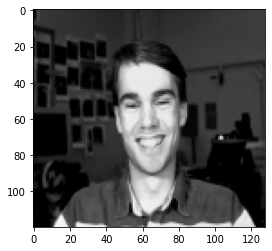

In [ ]:
X_image = []
image_name = "cheyer_straight_happy_open.png"
image = cv2.imread(os.path.join(folder_images_path, image_name))
image_flat = cv2.split(image)[0].flatten()

X_image.append(image_flat)
X_image = preprocessing.normalize(np.asarray(X_image))

if logistic_regression.predict(X_image.reshape(1, -1))[0] == 1:
  print('Está usando gafas de sol')
else:
  print('No está usando gafas de sol')

plt.imshow(image)

### Métricas de desempeño de la Regresión Logística

6. Se calcula la métrica F1score de la Regresión Logística.

In [ ]:
f1_score_LR = f1_score(y_test, predictions)
print("El F1score obtenido con la regresión logística es: ", round(f1_score_LR, 2))

El F1score obtenido con la regresión logística es:  0.78


7. Se calcula la matriz de confusión de la Regresión Logística.

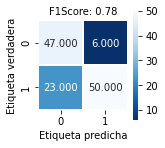

In [ ]:
confusion_matrix_LR = confusion_matrix(y_test, predictions)

plt.figure(figsize=(2,2))
sn.heatmap(confusion_matrix_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta verdadera');
plt.xlabel('Etiqueta predicha');
all_sample_title = 'F1Score: {0}'.format(round(f1_score_LR, 2))
plt.title(all_sample_title, size = 10);

## **Perceptrón Multicapa**

1. Se define el modelo y se ajusta (entrena) con el conjunto de entrenamiento.

In [ ]:
multilayer_perceptron = MLPClassifier(hidden_layer_sizes=(20, 5),
                                      batch_size=32,
                                      max_iter=400,
                                      early_stopping=True,
                                      validation_fraction=0.25,
                                      n_iter_no_change=50).fit(X_train, y_train)

2. Se hace las predicciones con el conjunto de testeo.

In [ ]:
predictions_PM = multilayer_perceptron.predict(X_test)

### Métricas de desempeño del Perceptrón Multicapa

3. Se calcula la métrica F1score del Perceptrón Multicapa.

In [ ]:
f1_score_PM = f1_score(y_test, predictions_PM)
print("El F1score obtenido con el perceptrón multicapa es: ", round(f1_score_PM, 2))

El F1score obtenido con el perceptrón multicapa es:  0.96


4. Se calcula la matriz de confusión del Perceptrón Multicapa.

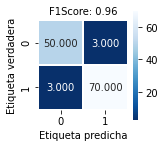

In [ ]:
confusion_matrix_PM = confusion_matrix(y_test, predictions_PM)
confusion_matrix_PM

plt.figure(figsize=(2,2))
sn.heatmap(confusion_matrix_PM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta verdadera');
plt.xlabel('Etiqueta predicha');
all_sample_title = 'F1Score: {0}'.format(round(f1_score_PM, 2))
plt.title(all_sample_title, size = 10);

5. Se predicen imágenes para demostrar el funcionamiento.

No está usando gafas de sol


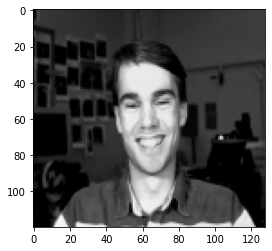

In [ ]:
X_image = []
image_name = "cheyer_straight_happy_open.png"
image = cv2.imread(os.path.join(folder_images_path, image_name))
image_flat = cv2.split(image)[0].flatten()

X_image.append(image_flat)
X_image = preprocessing.normalize(np.asarray(X_image))

if multilayer_perceptron.predict(X_image.reshape(1, -1))[0] == 1:
  print('Está usando gafas de sol')
else:
  print('No está usando gafas de sol')

plt.imshow(image)